* **amount_tsh** - Total static head (amount water available to waterpoint)
* **date_recorded** - The date the row was entered
* **funder** - Who funded the well
* **gps_height** - Altitude of the well
* **installer** - Organization that installed the well
* **longitude** - GPS coordinate
* **latitude** - GPS coordinate
* **wpt_name** - Name of the waterpoint if there is one
* **num_private** -
* **basin** - Geographic water basin
* **subvillage** - Geographic location
* **region** - Geographic location
* **region_code** - Geographic location (coded)
* **district_code** - Geographic location (coded)
* **lga** - Geographic location
* **ward** - Geographic location
* **population** - Population around the well
* **public_meeting** - True/False
* **recorded_by** - Group entering this row of data
* **scheme_management** - Who operates the waterpoint
* **scheme_name** - Who operates the waterpoint
* **permit** - If the waterpoint is permitted
* **construction_year** - Year the waterpoint was constructed
* **extraction_type** - The kind of extraction the waterpoint uses
* **extraction_type_group** - The kind of extraction the waterpoint uses
* **extraction_type_class** - The kind of extraction the waterpoint uses
* **management** - How the waterpoint is managed
* **management_group** - How the waterpoint is managed
* **payment** - What the water costs
* **payment_type** - What the water costs
* **water_quality** - The quality of the water
* **quality_group** - The quality of the water
* **quantity** - The quantity of water
* **quantity_group** - The quantity of water
* **source** - The source of the water
* **source_type** - The source of the water
* **source_class** - The source of the water
* **waterpoint_type** - The kind of waterpoint
* **waterpoint_type_group** - The kind of waterpoint

In [1277]:
#import packages
import numpy as np     
import pandas as pd     

import matplotlib.pyplot as plt  
%matplotlib inline        
import seaborn as sns
import plotly.graph_objects as go

import warnings
warnings.filterwarnings('ignore')

In [1278]:
#load provided dataset
training_set_labels = pd.read_csv('./Data/Training_Set_Labels.csv')
training_set_labels.head()

,id,status_group
0,69572,functional
1,8776,functional
2,34310,functional
3,67743,non functional
4,19728,functional


In [1279]:
#check shape
training_set_labels.shape

(59400, 2)

In [1280]:
#get summary
training_set_labels.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            59400 non-null  int64 
 1   status_group  59400 non-null  object
dtypes: int64(1), object(1)
memory usage: 928.2+ KB


In [1281]:
#get value count for each class
training_set_labels['status_group'].value_counts()

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

**training_set_labels** dataset has no missing data. This is our target variable. There are three classes:
* ‘functioning’
* ‘non-functioning’ 
* ‘functioning needs repair’

In order for the classification model to correctly predict the target, we need to change the labels from strings to integers.

In [1282]:
#load provided dataset
training_set_values = pd.read_csv('./Data/Training_Set_Values.csv')
training_set_values.head(10)

,id,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,num_private,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,0,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,0,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,0,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,0,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,0,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
5,9944,20.0,2011-03-13,Mkinga Distric Coun,0,DWE,39.172796,-4.765587,Tajiri,0,...,per bucket,salty,salty,enough,enough,other,other,unknown,communal standpipe multiple,communal standpipe
6,19816,0.0,2012-10-01,Dwsp,0,DWSP,33.362410,-3.766365,Kwa Ngomho,0,...,never pay,soft,good,enough,enough,machine dbh,borehole,groundwater,hand pump,hand pump
7,54551,0.0,2012-10-09,Rwssp,0,DWE,32.620617,-4.226198,Tushirikiane,0,...,unknown,milky,milky,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump
8,53934,0.0,2012-11-03,Wateraid,0,Water Aid,32.711100,-5.146712,Kwa Ramadhan Musa,0,...,never pay,salty,salty,seasonal,seasonal,machine dbh,borehole,groundwater,hand pump,hand pump
9,46144,0.0,2011-08-03,Isingiro Ho,0,Artisan,30.626991,-1.257051,Kwapeto,0,...,never pay,soft,good,enough,enough,shallow well,shallow well,groundwater,hand pump,hand pump


In [1283]:
#check the shape
training_set_values.shape

(59400, 40)

The dataset includes 40 independent features X.

In [1284]:
#get summary
training_set_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 40 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     59400 non-null  int64  
 1   amount_tsh             59400 non-null  float64
 2   date_recorded          59400 non-null  object 
 3   funder                 55765 non-null  object 
 4   gps_height             59400 non-null  int64  
 5   installer              55745 non-null  object 
 6   longitude              59400 non-null  float64
 7   latitude               59400 non-null  float64
 8   wpt_name               59400 non-null  object 
 9   num_private            59400 non-null  int64  
 10  basin                  59400 non-null  object 
 11  subvillage             59029 non-null  object 
 12  region                 59400 non-null  object 
 13  region_code            59400 non-null  int64  
 14  district_code          59400 non-null  int64  
 15  lg

In [1285]:
#check for missing values
training_set_values.isnull().sum()

id                           0
amount_tsh                   0
date_recorded                0
funder                    3635
gps_height                   0
installer                 3655
longitude                    0
latitude                     0
wpt_name                     0
num_private                  0
basin                        0
subvillage                 371
region                       0
region_code                  0
district_code                0
lga                          0
ward                         0
population                   0
public_meeting            3334
recorded_by                  0
scheme_management         3877
scheme_name              28166
permit                    3056
construction_year            0
extraction_type              0
extraction_type_group        0
extraction_type_class        0
management                   0
management_group             0
payment                      0
payment_type                 0
water_quality                0
quality_

In [1286]:
#merge
df = pd.merge(training_set_labels, training_set_values, on = 'id')
df.head()

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,payment_type,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,annually,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,never pay,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe
2,34310,functional,25.0,2013-02-25,Lottery Club,686,World vision,37.460664,-3.821329,Kwa Mahundi,...,per bucket,soft,good,enough,enough,dam,dam,surface,communal standpipe multiple,communal standpipe
3,67743,non functional,0.0,2013-01-28,Unicef,263,UNICEF,38.486161,-11.155298,Zahanati Ya Nanyumbu,...,never pay,soft,good,dry,dry,machine dbh,borehole,groundwater,communal standpipe multiple,communal standpipe
4,19728,functional,0.0,2011-07-13,Action In A,0,Artisan,31.130847,-1.825359,Shuleni,...,never pay,soft,good,seasonal,seasonal,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe


In [1287]:
#check shape
df.shape

(59400, 41)

The dataset has 59,400 entries and 40 columns/features (excluding 'id').
We will examine each column one by one.

# Cleaning and Initial EDA

## Target (y)

**'status_group'**

functional                 32259
non functional             22824
functional needs repair     4317
Name: status_group, dtype: int64

functional                 0.543081
non functional             0.384242
functional needs repair    0.072677
Name: status_group, dtype: float64


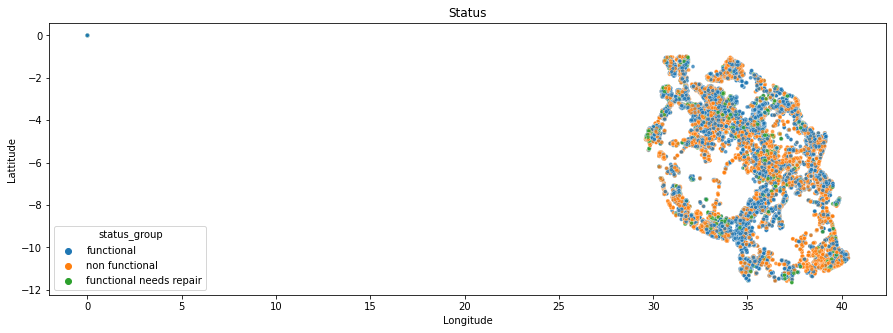

<Figure size 432x288 with 0 Axes>

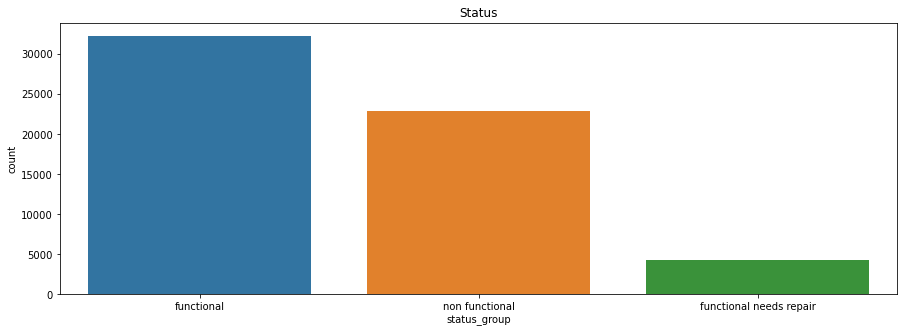

In [1288]:
#get value count
print(df['status_group'].value_counts())
print()
print(df['status_group'].value_counts(normalize = True))

#plot 
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'status_group', data = df, alpha = 0.75, s = 15)
plt.title('Status')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()
plt.savefig('./Data/status_group_scatterplot')

#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'status_group', data=df)
plt.title('Status')
plt.savefig('./Data/status_group_countplot')

There is a class imbalance for the target classes:

* 54% are functional
* 38% non-functional
* 7.26% functional, needs repair

We will have to use SMOTE later on to fix this problem.

## Explore Each Feature (X)

In [1289]:
#get column names
df.columns

Index(['id', 'status_group', 'amount_tsh', 'date_recorded', 'funder',
       'gps_height', 'installer', 'longitude', 'latitude', 'wpt_name',
       'num_private', 'basin', 'subvillage', 'region', 'region_code',
       'district_code', 'lga', 'ward', 'population', 'public_meeting',
       'recorded_by', 'scheme_management', 'scheme_name', 'permit',
       'construction_year', 'extraction_type', 'extraction_type_group',
       'extraction_type_class', 'management', 'management_group', 'payment',
       'payment_type', 'water_quality', 'quality_group', 'quantity',
       'quantity_group', 'source', 'source_type', 'source_class',
       'waterpoint_type', 'waterpoint_type_group'],
      dtype='object')

### **'amount_tsh'**

The total static head. It means the amount of water available to a waterpoint.

In [1290]:
#get value count
print(df['amount_tsh'].value_counts())

0.0         41639
500.0        3102
50.0         2472
1000.0       1488
20.0         1463
            ...  
8500.0          1
6300.0          1
220.0           1
138000.0        1
12.0            1
Name: amount_tsh, Length: 98, dtype: int64


The majority of data is 0.

In [1291]:
#get how many entries are 0
len(df[df['amount_tsh'] == 0]) / len(df)

0.700993265993266

70% of 'amount_tsh' is 0

In [1292]:
#describe excluding missing data
df['amount_tsh'][df['amount_tsh'] != 0].describe()

count     17761.000000
mean       1062.351942
std        5409.344940
min           0.200000
25%          50.000000
50%         250.000000
75%        1000.000000
max      350000.000000
Name: amount_tsh, dtype: float64

### **'date_recorded'** 

The date the row was entered

In [1293]:
#get value count
df['date_recorded'].value_counts()

2011-03-15    572
2011-03-17    558
2013-02-03    546
2011-03-14    520
2011-03-16    513
             ... 
2004-01-07      1
2011-09-23      1
2011-08-31      1
2011-09-09      1
2002-10-14      1
Name: date_recorded, Length: 356, dtype: int64

In [1294]:
from datetime import datetime

#convert 'date_recorded'to a datetime object
df['date_recorded'] = pd.to_datetime(df['date_recorded'])

#add 'year_recorded' column
df['year_recorded'] = pd.DatetimeIndex(df['date_recorded']).year

#review
df.head(2)

,id,status_group,amount_tsh,date_recorded,funder,gps_height,installer,longitude,latitude,wpt_name,...,water_quality,quality_group,quantity,quantity_group,source,source_type,source_class,waterpoint_type,waterpoint_type_group,year_recorded
0,69572,functional,6000.0,2011-03-14,Roman,1390,Roman,34.938093,-9.856322,none,...,soft,good,enough,enough,spring,spring,groundwater,communal standpipe,communal standpipe,2011
1,8776,functional,0.0,2013-03-06,Grumeti,1399,GRUMETI,34.698766,-2.147466,Zahanati,...,soft,good,insufficient,insufficient,rainwater harvesting,rainwater harvesting,surface,communal standpipe,communal standpipe,2013


In [1295]:
#check summary statistics
df['year_recorded'].describe()

count    59400.000000
mean      2011.921667
std          0.958758
min       2002.000000
25%       2011.000000
50%       2012.000000
75%       2013.000000
max       2013.000000
Name: year_recorded, dtype: float64

In [1296]:
#drop 'date_recoreded' because we don't need it anymore
df.drop(columns = 'date_recorded', axis = 1, inplace = True)

### **'funder'**
Who funded the well

In [1297]:
#get value counts
df['funder'].value_counts()

Government Of Tanzania            9084
Danida                            3114
Hesawa                            2202
Rwssp                             1374
World Bank                        1349
                                  ... 
Saudia                               1
Taasaf                               1
Siter Fransis                        1
Shelisheli Commission                1
African Reflections Foundation       1
Name: funder, Length: 1897, dtype: int64

In [1298]:
#'funder' has missing values
print('Missing values before:', df['funder'].isna().sum())

#fill missing values with 'Others'
df['funder'].fillna('Other', inplace = True)
print('Missing values after:', df['funder'].isna().sum())

Missing values before: 3635
Missing values after: 0


### **'gps_height'**
Altitude of the well

In [1299]:
#get value counts
df['gps_height'].value_counts()

 0       20438
-15         60
-16         55
-13         55
-20         52
         ...  
 2285        1
 2424        1
 2552        1
 2413        1
 2385        1
Name: gps_height, Length: 2428, dtype: int64

In [1300]:
#get how many entries are 0
len(df[df['gps_height'] == 0]) / len(df)

0.3440740740740741

### **'installer'**
Organization that installed the well

In [1301]:
#get value count
df['installer'].value_counts()

DWE                     17402
Government               1825
RWE                      1206
Commu                    1060
DANIDA                   1050
                        ...  
DWE & LWI                   1
Tanzania government         1
Goldwill  foundation        1
Afroz Ismail                1
HESAWS                      1
Name: installer, Length: 2145, dtype: int64

In [1302]:
#'installer' has missing values
print('Missing values before:', df['installer'].isna().sum())

#fill missing values with 'Others'
df['installer'].fillna('Other', inplace = True)
print('Missing values after:', df['installer'].isna().sum())

Missing values before: 3655
Missing values after: 0


## **'wpt_name'**
Name of the waterpoint if there is one

In [1303]:
#get value count
df['wpt_name'].value_counts()

none                  3563
Shuleni               1748
Zahanati               830
Msikitini              535
Kanisani               323
                      ... 
Ccm Office Kifumbe       1
Modui 2                  1
Kwa Maela                1
Kwaihano                 1
Kumguruka B              1
Name: wpt_name, Length: 37400, dtype: int64

In [1304]:
#get how many entries are 'none'
len(df[df['wpt_name'] == 'none']) / len(df)

0.059983164983164985

**'num_private'**

In [1305]:
#get value count
df['num_private'].value_counts()

0      58643
6         81
1         73
5         46
8         46
       ...  
180        1
213        1
23         1
55         1
94         1
Name: num_private, Length: 65, dtype: int64

In [1306]:
#'num_private' has too many 0 values, drop it
df.drop(columns = 'num_private', axis = 1, inplace = True)

### **'basin'**
A topographic region in which all water drains to a common area.

Lake Victoria              10248
Pangani                     8940
Rufiji                      7976
Internal                    7785
Lake Tanganyika             6432
Wami / Ruvu                 5987
Lake Nyasa                  5085
Ruvuma / Southern Coast     4493
Lake Rukwa                  2454
Name: basin, dtype: int64


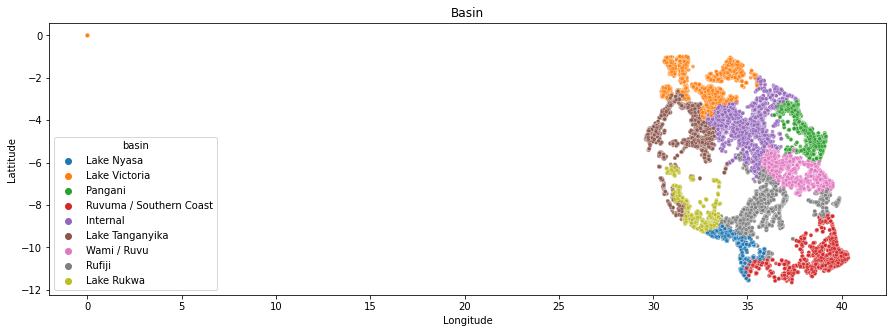

<Figure size 432x288 with 0 Axes>

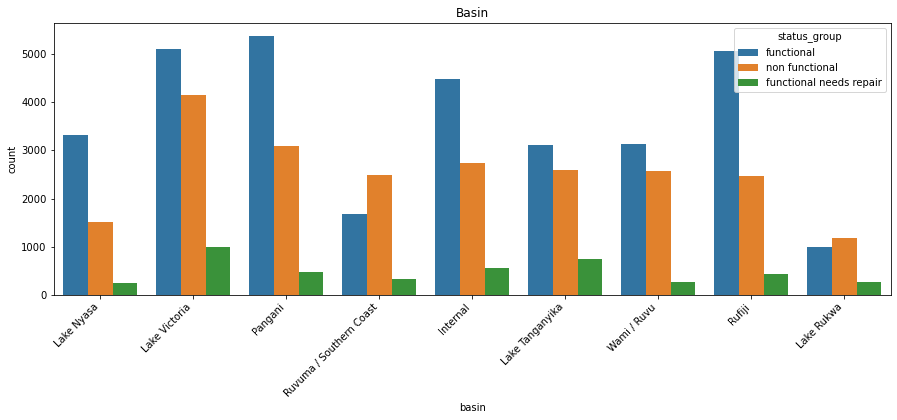

In [1307]:
#get value count
print(df['basin'].value_counts())

#plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'basin', data = df, alpha = 0.75, s = 15)
plt.title('Basin')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()
plt.savefig('./Data/basin_scatterplot')

#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'basin', hue = 'status_group', data = df)
plt.title('Basin')
plt.xticks(ha = 'right', rotation = 45)
plt.savefig('./Data/basin_countplot')

### **'subvillage'**
Geographic location

In [1308]:
#get value counts
df['subvillage'].value_counts()

Madukani        508
Shuleni         506
Majengo         502
Kati            373
Mtakuja         262
               ... 
Sangu Jineli      1
Mwaduguru         1
Zugimlole         1
Kinankoli         1
Tugi              1
Name: subvillage, Length: 19287, dtype: int64

In [1309]:
#'subvillage' has missing values
print('Missing values before:', df['subvillage'].isna().sum())

#fill missing values with 'Others'
df['subvillage'].fillna('Other', inplace = True)
print('Missing values after:', df['subvillage'].isna().sum())

Missing values before: 371
Missing values after: 0


### **'region'
Geographic location

In [1310]:
#get value counts
df['region'].value_counts()

Iringa           5294
Shinyanga        4982
Mbeya            4639
Kilimanjaro      4379
Morogoro         4006
Arusha           3350
Kagera           3316
Mwanza           3102
Kigoma           2816
Ruvuma           2640
Pwani            2635
Tanga            2547
Dodoma           2201
Singida          2093
Mara             1969
Tabora           1959
Rukwa            1808
Mtwara           1730
Manyara          1583
Lindi            1546
Dar es Salaam     805
Name: region, dtype: int64

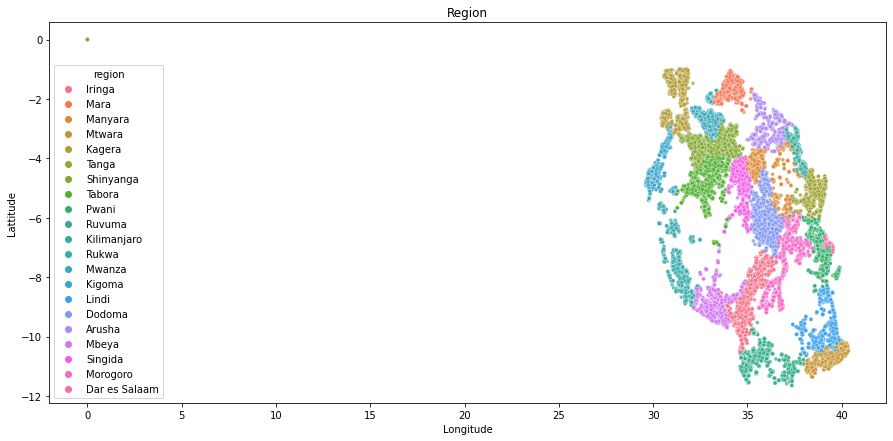

<Figure size 432x288 with 0 Axes>

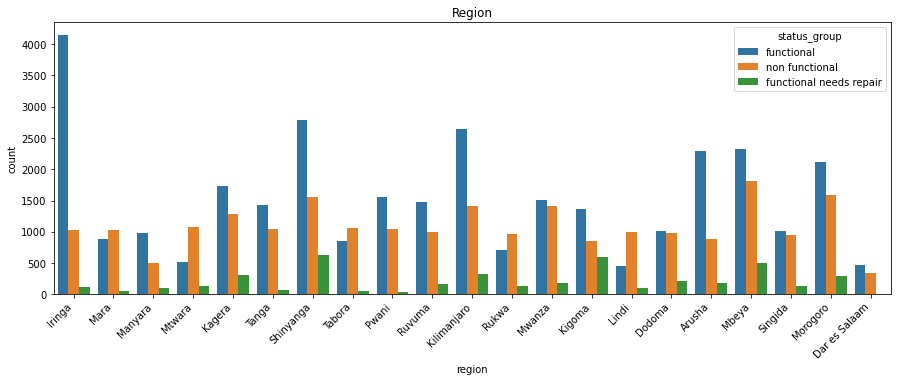

In [1311]:
#plot
plt.figure(figsize = (15, 7))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'region', data = df, alpha = 0.75, s = 15)
plt.title('Region')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()
plt.savefig('./Data/region_scatterplot')

#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'region', hue = 'status_group', data = df)
plt.title('Region')
plt.xticks(ha = 'right', rotation = 45)
plt.savefig('./Data/region_countplot')

### 'region_code'
Geographic location (coded)

In [1312]:
#get value counts
df['region_code'].value_counts()

11    5300
17    5011
12    4639
3     4379
5     4040
18    3324
19    3047
2     3024
16    2816
10    2640
4     2513
1     2201
13    2093
14    1979
20    1969
15    1808
6     1609
21    1583
80    1238
60    1025
90     917
7      805
99     423
9      390
24     326
8      300
40       1
Name: region_code, dtype: int64

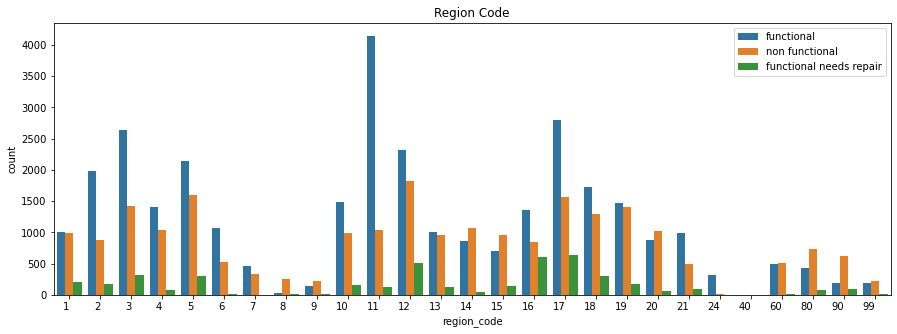

In [1313]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'region_code', hue = 'status_group', data = df)
plt.title('Region Code')
plt.xticks(ha = 'right')
plt.legend(loc = 'upper right')
plt.savefig('./Data/region_code_countplot')

### 'district_code'
Geographic location (coded)

In [1314]:
#get value counts
df['district_code'].value_counts()

1     12203
2     11173
3      9998
4      8999
5      4356
6      4074
7      3343
8      1043
30      995
33      874
53      745
43      505
13      391
23      293
63      195
62      109
60       63
0        23
80       12
67        6
Name: district_code, dtype: int64

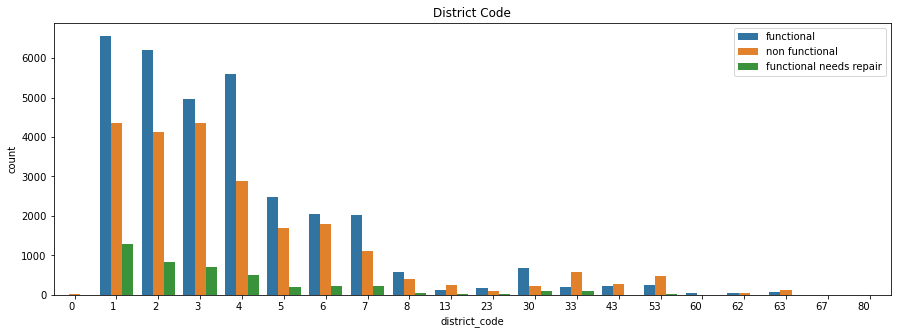

In [1315]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'district_code', hue = 'status_group', data = df)
plt.title('District Code')
plt.xticks(ha = 'right')
plt.legend(loc = 'upper right')
plt.savefig('./Data/district_code_countplot')

### **'lga'**
Geographic location

In [1316]:
#get value count
df['lga'].value_counts()

Njombe          2503
Arusha Rural    1252
Moshi Rural     1251
Bariadi         1177
Rungwe          1106
                ... 
Moshi Urban       79
Kigoma Urban      71
Arusha Urban      63
Lindi Urban       21
Nyamagana          1
Name: lga, Length: 125, dtype: int64

### **'ward'**
Geographic location

In [1317]:
#get value count
df['ward'].value_counts()

Igosi            307
Imalinyi         252
Siha Kati        232
Mdandu           231
Nduruma          217
                ... 
Kihangimahuka      1
Kitete             1
Mawenzi            1
Mkumbi             1
Kirongo            1
Name: ward, Length: 2092, dtype: int64

### **'population'**
Population around the well

In [1318]:
#get value count
print(df['population'].value_counts())

#too many 0 value, this column is not useful, drop it
#df.drop(columns = 'population', axis = 1, inplace = True)

0       21381
1        7025
200      1940
150      1892
250      1681
        ...  
3241        1
1960        1
1685        1
2248        1
1439        1
Name: population, Length: 1049, dtype: int64


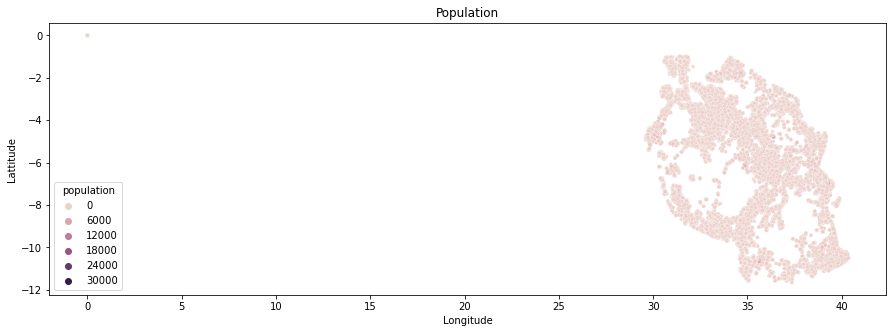

<Figure size 432x288 with 0 Axes>

In [1319]:
#plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'population', data = df, alpha = 0.75, s = 15)
plt.title('Population')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()
plt.savefig('./Data/population_scatterplot')

### **'public_meeting'**
True/False

In [1320]:
#get value count
df['public_meeting'].value_counts()

True     51011
False     5055
Name: public_meeting, dtype: int64

In [1321]:
#'public_meeting' has missing values
print('Missing values before:', df['public_meeting'].isna().sum())

#fill missing values with 'False' because it's better to be false negative than false positive in this case
df['public_meeting'].fillna('False', inplace = True)
print('Missing values after:', df['public_meeting'].isna().sum())

Missing values before: 3334
Missing values after: 0


### **'recorded_by'**
Group entering this row of data

In [1322]:
#get value counts
print(df['recorded_by'].value_counts())

#this column is not useful, drop it
df.drop(columns = 'recorded_by', axis = 1, inplace = True)

GeoData Consultants Ltd    59400
Name: recorded_by, dtype: int64


### **'scheme_management'**
Who operates the waterpoint

In [1323]:
#get value count
df['scheme_management'].value_counts()

VWC                 36793
WUG                  5206
Water authority      3153
WUA                  2883
Water Board          2748
Parastatal           1680
Private operator     1063
Company              1061
Other                 766
SWC                    97
Trust                  72
None                    1
Name: scheme_management, dtype: int64

In [1324]:
#'scheme_management' has missing values
print('Missing values before:', df['scheme_management'].isna().sum())

#fill missing values with 'Other' 
df['scheme_management'].fillna('Other', inplace = True)
print('Missing values after:', df['scheme_management'].isna().sum())

Missing values before: 3877
Missing values after: 0


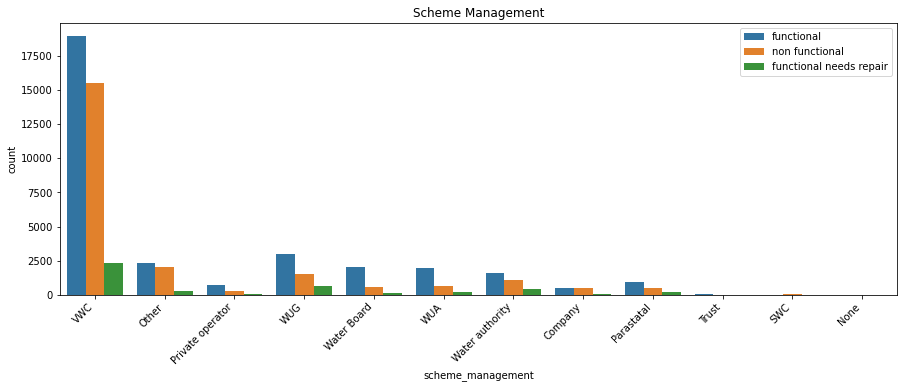

In [1325]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'scheme_management', hue = 'status_group', data = df)
plt.title('Scheme Management')
plt.xticks(ha = 'right', rotation = 45)
plt.legend(loc = 'upper right')
plt.savefig('./Data/scheme_management_countplot')

### **'scheme_name'**
Who operates the waterpoint

In [1326]:
#get value count
df['scheme_name'].value_counts()

K                           682
None                        644
Borehole                    546
Chalinze wate               405
M                           400
                           ... 
Rain water harest             1
Mumikindo  spring source      1
BL Orkugu                     1
Mnazi moja                    1
Damowaso                      1
Name: scheme_name, Length: 2696, dtype: int64

In [1327]:
#'scheme_name' has missing values
print('Missing values before:', df['scheme_name'].isna().sum())

#fill missing values with 'None' 
df['scheme_name'].fillna('None', inplace = True)
print('Missing values after:', df['scheme_name'].isna().sum())

Missing values before: 28166
Missing values after: 0


### **'permit'**
If the waterpoint is permitted

In [1328]:
#get value count
df['permit'].value_counts()

True     38852
False    17492
Name: permit, dtype: int64

In [1329]:
#'permit' has missing values
print('Missing values before:', df['permit'].isna().sum())

#fill missing values with 'False' because it's better to be false negative than false positive in this case
df['permit'].fillna('False', inplace = True)
print('Missing values after:', df['permit'].isna().sum())

Missing values before: 3056
Missing values after: 0


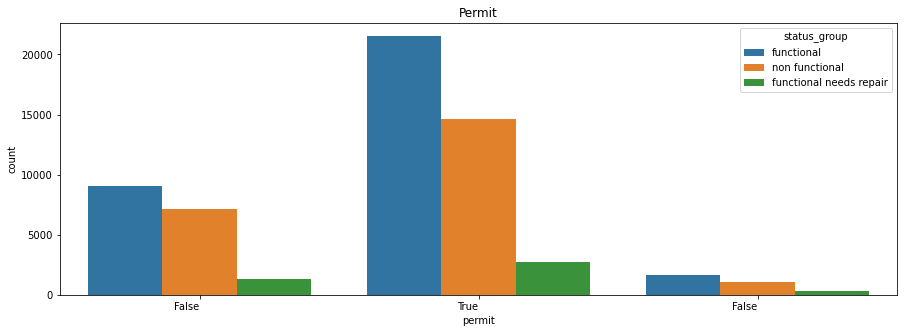

In [1330]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'permit', hue = 'status_group', data = df)
plt.title('Permit')
plt.xticks(ha = 'right')
plt.savefig('./Data/permit_countplot')

### **'construction_year'**
Year the waterpoint was constructed

In [1331]:
#get value count
df['construction_year'].value_counts()

0       20709
2010     2645
2008     2613
2009     2533
2000     2091
2007     1587
2006     1471
2003     1286
2011     1256
2004     1123
2012     1084
2002     1075
1978     1037
1995     1014
2005     1011
1999      979
1998      966
1990      954
1985      945
1980      811
1996      811
1984      779
1982      744
1994      738
1972      708
1974      676
1997      644
1992      640
1993      608
2001      540
1988      521
1983      488
1975      437
1986      434
1976      414
1970      411
1991      324
1989      316
1987      302
1981      238
1977      202
1979      192
1973      184
2013      176
1971      145
1960      102
1967       88
1963       85
1968       77
1969       59
1964       40
1962       30
1961       21
1965       19
1966       17
Name: construction_year, dtype: int64

In [1332]:
#replace '0' with median value
df['construction_year'].replace(0, df['construction_year'].median(), inplace = True)

#check
(df['construction_year'] == 0).sum()

0

<AxesSubplot:>

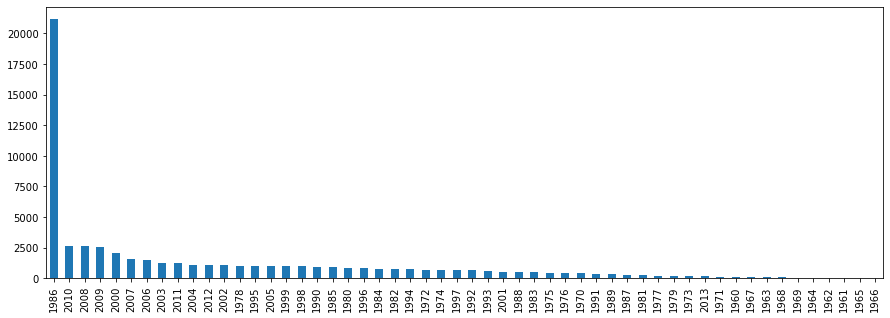

In [1333]:
#plot
df['construction_year'].value_counts().plot.bar(figsize = (15, 5))

In [1334]:
#get 'age'
df['age'] = 2021 - df['construction_year'].map(int)
df['age'].value_counts()

35    21143
11     2645
13     2613
12     2533
21     2091
14     1587
15     1471
18     1286
10     1256
17     1123
9      1084
19     1075
43     1037
26     1014
16     1011
22      979
23      966
31      954
36      945
41      811
25      811
37      779
39      744
27      738
49      708
47      676
24      644
29      640
28      608
20      540
33      521
38      488
46      437
45      414
51      411
30      324
32      316
34      302
40      238
44      202
42      192
48      184
8       176
50      145
61      102
54       88
58       85
53       77
52       59
57       40
59       30
60       21
56       19
55       17
Name: age, dtype: int64

<AxesSubplot:>

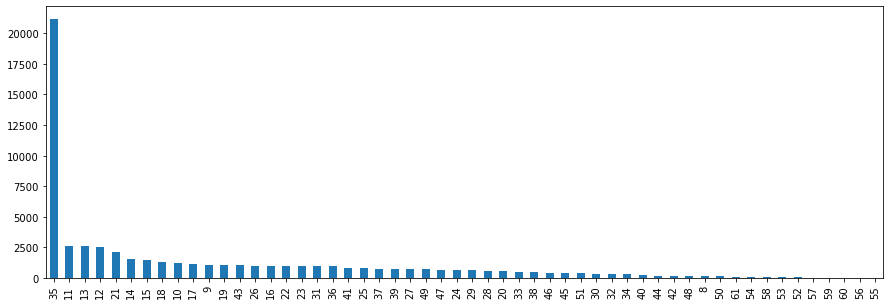

In [1335]:
#plot
df['age'].value_counts().plot.bar(figsize = (15, 5))

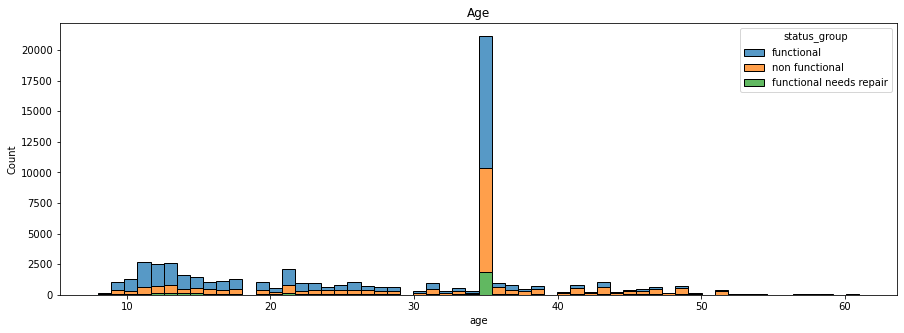

In [1336]:
#plot
plt.figure(figsize = (15, 5))
sns.histplot(df, x = 'age', hue = 'status_group', multiple = 'stack')
plt.title('Age')
plt.savefig('./Data/age_histplot')

In [1337]:
#drop 'construction_year' because we don't need it anymore
df.drop(columns = 'construction_year', axis = 1, inplace = True)

### **'extraction_type'**
The kind of extraction the waterpoint uses

In [1338]:
#get value count
print(df['extraction_type'].value_counts())

gravity                      26780
nira/tanira                   8154
other                         6430
submersible                   4764
swn 80                        3670
mono                          2865
india mark ii                 2400
afridev                       1770
ksb                           1415
other - rope pump              451
other - swn 81                 229
windmill                       117
india mark iii                  98
cemo                            90
other - play pump               85
walimi                          48
climax                          32
other - mkulima/shinyanga        2
Name: extraction_type, dtype: int64


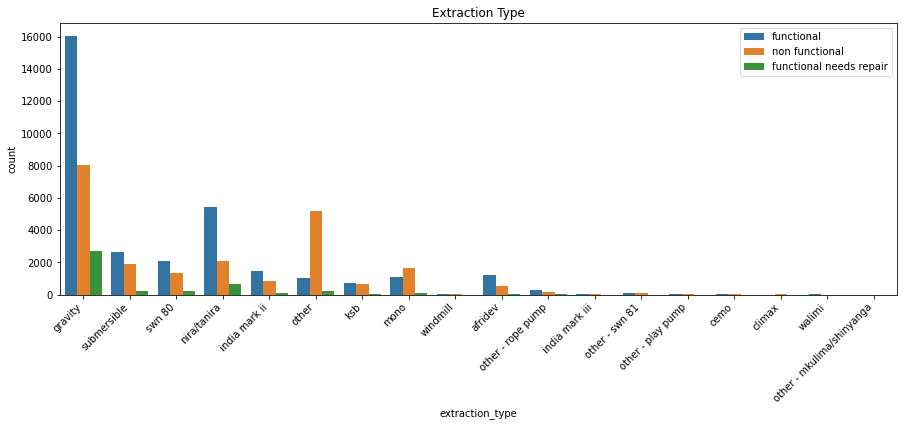

In [1339]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'extraction_type', hue = 'status_group', data=df)
plt.title('Extraction Type')
plt.xticks(ha = 'right', rotation = 45)
plt.legend(loc = 'upper right')
plt.savefig('./Data/extraction_type_countplot')

### **'extraction_type_group'**
The kind of extraction the waterpoint uses

In [1340]:
#get value count
df['extraction_type_group'].value_counts()

gravity            26780
nira/tanira         8154
other               6430
submersible         6179
swn 80              3670
mono                2865
india mark ii       2400
afridev             1770
rope pump            451
other handpump       364
other motorpump      122
wind-powered         117
india mark iii        98
Name: extraction_type_group, dtype: int64

In [1341]:
#this column is redundant since it is similar to 'extraction_type', drop it
df.drop(columns = 'extraction_type_group', axis = 1, inplace = True)

### **'extraction_type_class'**
The kind of extraction the waterpoint uses

In [1342]:
#get value count
df['extraction_type_class'].value_counts()

gravity         26780
handpump        16456
other            6430
submersible      6179
motorpump        2987
rope pump         451
wind-powered      117
Name: extraction_type_class, dtype: int64

In [1343]:
#this column is redundant since it is similar to 'extraction_type', drop it
df.drop(columns = 'extraction_type_class', axis = 1, inplace = True)

### **'management'**
How the waterpoint is managed

In [1344]:
#get value counts
print(df['management'].value_counts())

vwc                 40507
wug                  6515
water board          2933
wua                  2535
private operator     1971
parastatal           1768
water authority       904
other                 844
company               685
unknown               561
other - school         99
trust                  78
Name: management, dtype: int64


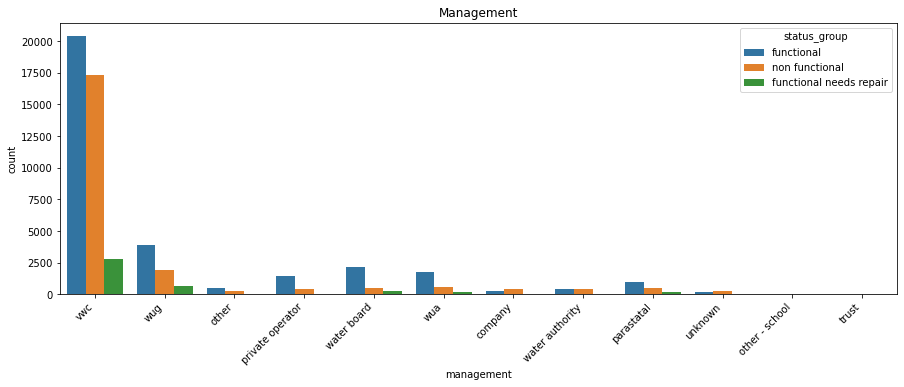

In [1345]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'management', hue = 'status_group', data = df)
plt.title('Management')
plt.xticks(ha = 'right', rotation = 45)
plt.savefig('./Data/management_countplot')

### **'management_group'**
How the waterpoint is managed

In [1346]:
#get value count
df['management_group'].value_counts()

user-group    52490
commercial     3638
parastatal     1768
other           943
unknown         561
Name: management_group, dtype: int64

In [1347]:
#'management' and 'management_group' have the same name, they might be sub-group of each other, let's group them together
df.groupby(['management_group', 'management']).count()

id  status_group  amount_tsh  funder  \
management_group management                                                  
commercial       company             685           685         685     685   
                 private operator   1971          1971        1971    1971   
                 trust                78            78          78      78   
                 water authority     904           904         904     904   
other            other               844           844         844     844   
                 other - school       99            99          99      99   
parastatal       parastatal         1768          1768        1768    1768   
unknown          unknown             561           561         561     561   
user-group       vwc               40507         40507       40507   40507   
                 water board        2933          2933        2933    2933   
                 wua                2535          2535        2535    2535   
                 wug                6515          6515        6515    6515   

                                   gps_height  installer  longitude  latitude  \
management_group management                                                     
commercial       company                  685        685        685       685   
                 private operator        1971       1971       1971      1971   
                 trust                     78         78         78        78   
                 water authority          904        904        904       904   
other            other                    844        844        844       844   
                 other - school            99         99         99        99   
parastatal       parastatal              1768       1768       1768      1768   
unknown          unknown                  561        561        561       561   
user-group       vwc                    40507      40507      40507     40507   
                 water board             2933       2933       2933      2933   
                 wua                     2535       2535       2535      2535   
                 wug                     6515       6515       6515      6515   

                                   wpt_name  basin  ...  quality_group  \
management_group management                         ...                  
commercial       company                685    685  ...            685   
                 private operator      1971   1971  ...           1971   
                 trust                   78     78  ...             78   
                 water authority        904    904  ...            904   
other            other                  844    844  ...            844   
                 other - school          99     99  ...             99   
parastatal       parastatal            1768   1768  ...           1768   
unknown          unknown                561    561  ...            561   
user-group       vwc                  40507  40507  ...          40507   
                 water board           2933   2933  ...           2933   
                 wua                   2535   2535  ...           2535   
                 wug                   6515   6515  ...           6515   

                                   quantity  quantity_group  source  \
management_group management                                           
commercial       company                685             685     685   
                 private operator      1971            1971    1971   
                 trust                   78              78      78   
                 water authority        904             904     904   
other            other                  844             844     844   
                 other - school          99              99      99   
parastatal       parastatal            1768            1768    1768   
unknown          unknown                561             561     561   
user-group       vwc                  40507           40507   4

In [1348]:
#'management_group' is just a bigger container of 'management' , drop it
df.drop(columns = 'management_group', axis = 1, inplace = True)

### **'payment'**
What the water costs

In [1349]:
#get value counts
print(df['payment'].value_counts())

never pay                25348
pay per bucket            8985
pay monthly               8300
unknown                   8157
pay when scheme fails     3914
pay annually              3642
other                     1054
Name: payment, dtype: int64


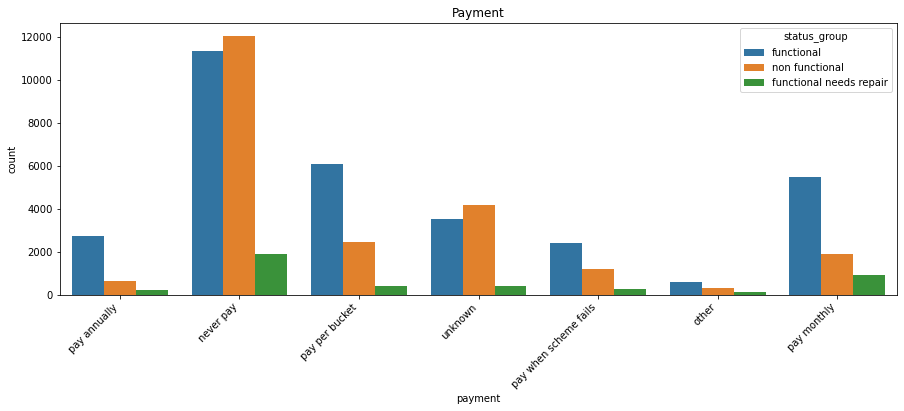

In [1350]:
#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'payment', hue = 'status_group', data = df)
plt.title('Payment')
plt.xticks(ha = 'right', rotation = 45)
plt.savefig('./Data/payment_countplot')

### **'payment_type'**
What the water costs

In [1351]:
#get value counts
df['payment_type'].value_counts()

never pay     25348
per bucket     8985
monthly        8300
unknown        8157
on failure     3914
annually       3642
other          1054
Name: payment_type, dtype: int64

In [1352]:
#this column is redundant since it is similar to 'payment', drop it, drop it
df.drop(columns = 'payment_type', axis = 1, inplace = True)

### **'water_quality'**
The quality of the water

soft                  50818
salty                  4856
unknown                1876
milky                   804
coloured                490
salty abandoned         339
fluoride                200
fluoride abandoned       17
Name: water_quality, dtype: int64


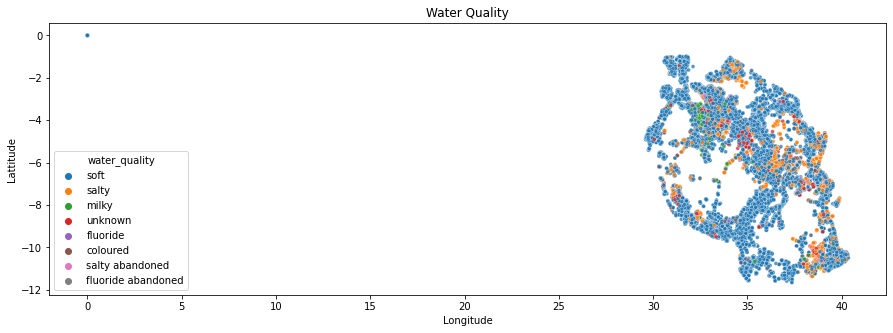

<Figure size 432x288 with 0 Axes>

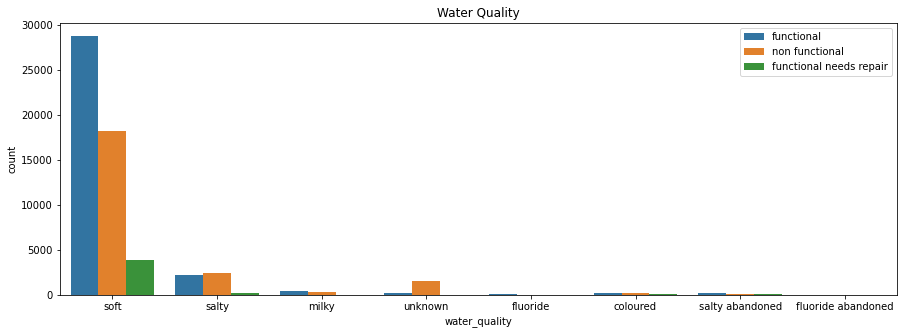

In [1353]:
#get value count
print(df['water_quality'].value_counts())

#plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'water_quality', data = df, alpha = 0.75, s = 15)
plt.title('Water Quality')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()
plt.savefig('./Data/water_quality_scatterplot')

#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'water_quality', hue = 'status_group', data=df)
plt.title('Water Quality')
plt.legend(loc = 'upper right')
plt.savefig('./Data/water_quality_countplot')

### **'quality_group'**
The quality of the water

In [1354]:
#get value count
print(df['quality_group'].value_counts())

#this column is redundant since it is similar to 'water_quality', drop it
df.drop(columns = 'quality_group', axis = 1, inplace = True)

good        50818
salty        5195
unknown      1876
milky         804
colored       490
fluoride      217
Name: quality_group, dtype: int64


### **'quantity'**
The quantity of water

In [1355]:
#get value count
print(df['quantity'].value_counts())

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity, dtype: int64


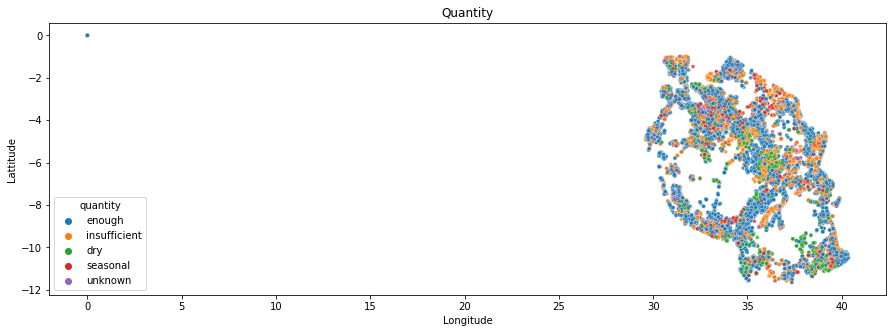

<Figure size 432x288 with 0 Axes>

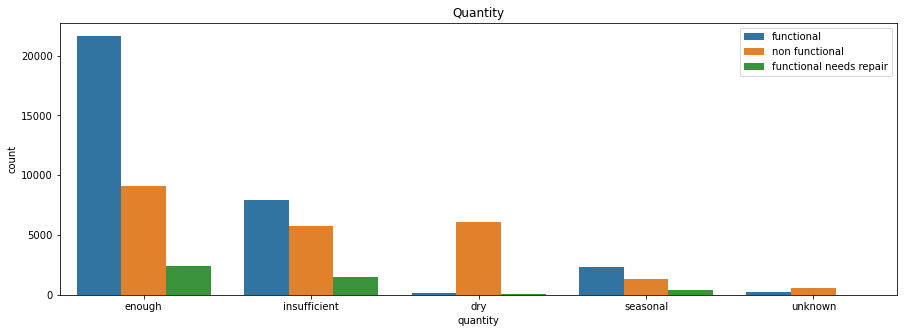

In [1356]:
#plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'quantity', data = df, alpha = 0.75, s = 15)
plt.title('Quantity')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()
plt.savefig('./Data/quantity_scatterplot')

#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'quantity', hue = 'status_group', data=df)
plt.title('Quantity')
plt.legend(loc = 'upper right')
plt.savefig('./Data/quantity_countplot')

### **'quantity_group'**
The quantity of water

In [1357]:
#get value count
print(df['quantity_group'].value_counts())

#this column is redundant since it is similar to 'quantity', drop it
df.drop(columns = 'quantity_group', axis = 1, inplace = True)

enough          33186
insufficient    15129
dry              6246
seasonal         4050
unknown           789
Name: quantity_group, dtype: int64


### **'source'**
The source of the water

In [1358]:
#get value count
print(df['source'].value_counts())

spring                  17021
shallow well            16824
machine dbh             11075
river                    9612
rainwater harvesting     2295
hand dtw                  874
lake                      765
dam                       656
other                     212
unknown                    66
Name: source, dtype: int64


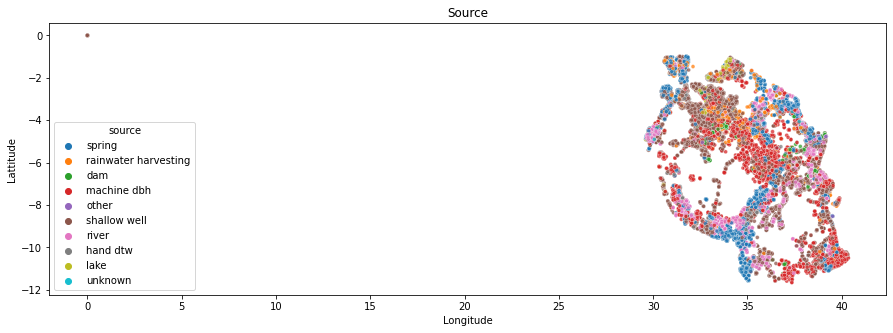

<Figure size 432x288 with 0 Axes>

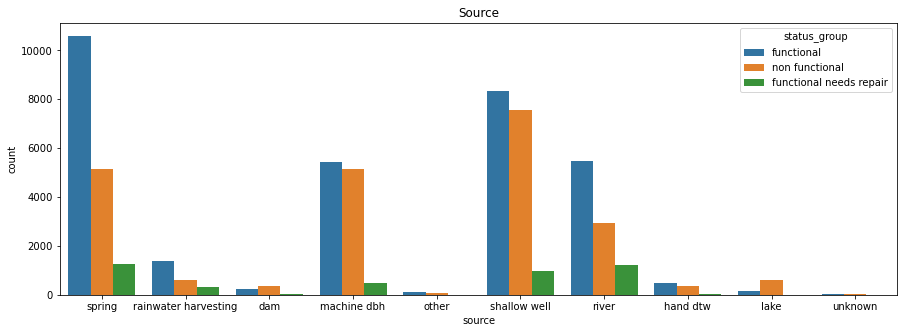

In [1359]:
#plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'source', data = df, alpha = 0.75, s = 15)
plt.title('Source')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()
plt.savefig('./Data/source_scatterplot')

#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'source', hue = 'status_group', data=df)
plt.title('Source')
plt.savefig('./Data/source_countplot')

### **'source_type'**
The source of the water

In [1360]:
#get value count
print(df['source_type'].value_counts())

#this column is redundant since it is similar to 'source', drop it
df.drop(columns = 'source_type', axis = 1, inplace = True)

spring                  17021
shallow well            16824
borehole                11949
river/lake              10377
rainwater harvesting     2295
dam                       656
other                     278
Name: source_type, dtype: int64


### **'source_class'**
The source of the water

In [1361]:
#get value count
print(df['source_class'].value_counts())

groundwater    45794
surface        13328
unknown          278
Name: source_class, dtype: int64


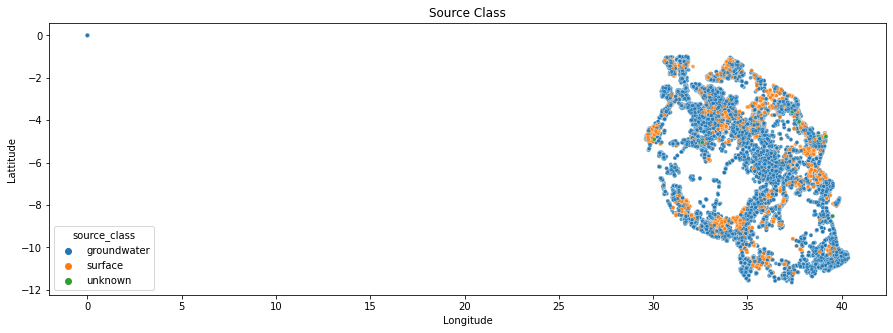

<Figure size 432x288 with 0 Axes>

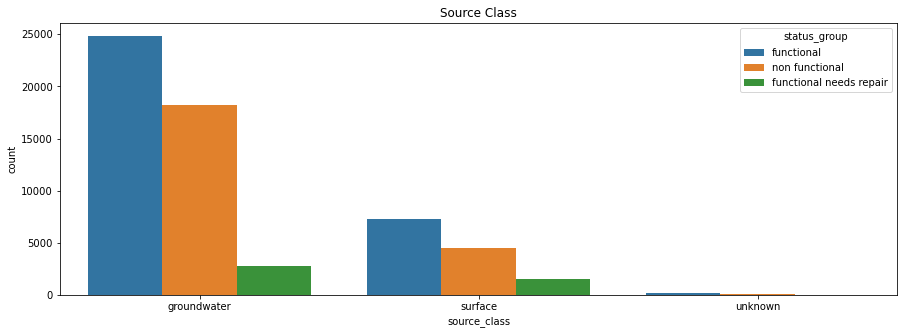

In [1362]:
#plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'source_class', data = df, alpha = 0.75, s = 15)
plt.title('Source Class')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()
plt.savefig('./Data/source_class_scatterplot')

#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'source_class', hue = 'status_group', data=df)
plt.title('Source Class')
plt.savefig('./Data/source_class_countplot')

### **'waterpoint_type'**
The kind of waterpoint

In [1363]:
#get value count
print(df['waterpoint_type'].value_counts())

communal standpipe             28522
hand pump                      17488
other                           6380
communal standpipe multiple     6103
improved spring                  784
cattle trough                    116
dam                                7
Name: waterpoint_type, dtype: int64


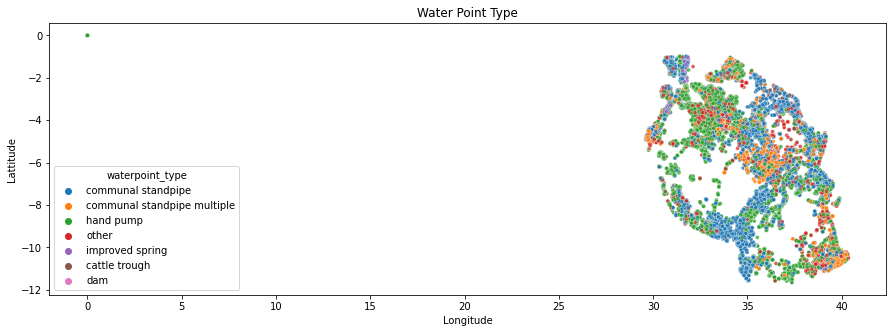

<Figure size 432x288 with 0 Axes>

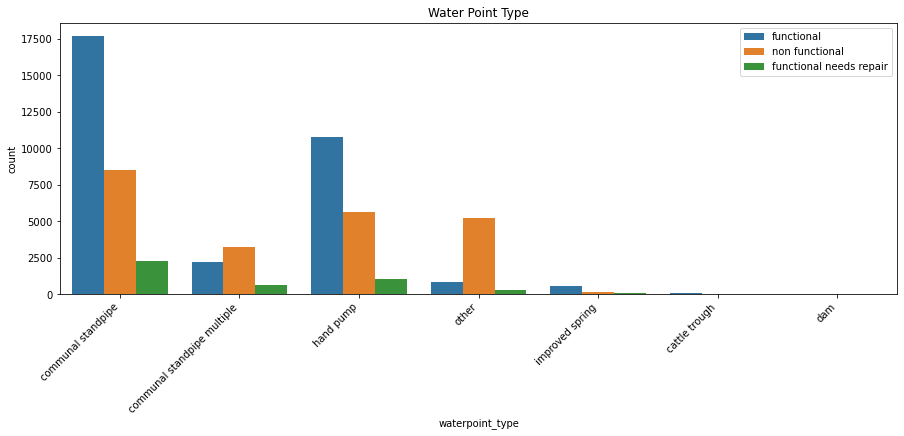

In [1364]:
#plot
plt.figure(figsize = (15, 5))
sns.scatterplot(x = 'longitude', y = 'latitude',
                hue = 'waterpoint_type', data = df, alpha = 0.75, s = 15)
plt.title('Water Point Type')
plt.xlabel('Longitude')
plt.ylabel('Lattitude')
plt.show()
plt.savefig('./Data/waterpoint_type_scatterplot')

#plot
plt.figure(figsize = (15, 5))
sns.countplot(x = 'waterpoint_type', hue = 'status_group', data=df)
plt.title('Water Point Type')
plt.xticks(ha = 'right', rotation = 45)
plt.legend(loc = 'upper right')
plt.savefig('./Data/waterpoint_type_countplot')

### **'waterpoint_type_group'**
The kind of waterpoint

In [1365]:
#get value count
print(df['waterpoint_type_group'].value_counts())

#this column is redundant since it is similar to 'waterpoint_type', drop it
df.drop(columns = 'waterpoint_type_group', axis = 1, inplace = True)

communal standpipe    34625
hand pump             17488
other                  6380
improved spring         784
cattle trough           116
dam                       7
Name: waterpoint_type_group, dtype: int64


### Rechecking

In [1366]:
#check remaining columns
df.columns

Index(['id', 'status_group', 'amount_tsh', 'funder', 'gps_height', 'installer',
       'longitude', 'latitude', 'wpt_name', 'basin', 'subvillage', 'region',
       'region_code', 'district_code', 'lga', 'ward', 'population',
       'public_meeting', 'scheme_management', 'scheme_name', 'permit',
       'extraction_type', 'management', 'payment', 'water_quality', 'quantity',
       'source', 'source_class', 'waterpoint_type', 'year_recorded', 'age'],
      dtype='object')

In [1367]:
#check shape
df.shape

(59400, 31)

In [1368]:
#check missing value
df.isnull().sum()

id                   0
status_group         0
amount_tsh           0
funder               0
gps_height           0
installer            0
longitude            0
latitude             0
wpt_name             0
basin                0
subvillage           0
region               0
region_code          0
district_code        0
lga                  0
ward                 0
population           0
public_meeting       0
scheme_management    0
scheme_name          0
permit               0
extraction_type      0
management           0
payment              0
water_quality        0
quantity             0
source               0
source_class         0
waterpoint_type      0
year_recorded        0
age                  0
dtype: int64

# Preprocessing Data

## Continuous Features

## Categorical Features